In [4]:
#importing the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224,224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [6]:
# Importing resnet50 library and add preprocessing layer
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)
## The [3] is number of channels, in our case RGB

In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [8]:
folders = glob('Datasets/train/*')

In [9]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [10]:
# Flatten the resnet output
x = Flatten()(resnet.output)

In [11]:
len(folders)

3

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)
# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,888,771 (91.13 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:
# Tell the model what cost and optimization method to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [15]:
# Use image data generator to import the images from dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#performing image augmentation for training data.
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# no image augmentation needed for test data.
test_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
#Fitting the model 
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 7s/step - accuracy: 0.4167 - loss: 3.4058 - val_accuracy: 0.3276 - val_loss: 7.5244
Epoch 2/50


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 0.4375 - loss: 3.1877 - val_accuracy: 0.5172 - val_loss: 4.8584
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.3333 - loss: 6.6205 - val_accuracy: 0.5862 - val_loss: 1.7894
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 0.5104 - loss: 2.5895 - val_accuracy: 0.3621 - val_loss: 4.8277
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 0.4479 - loss: 3.6

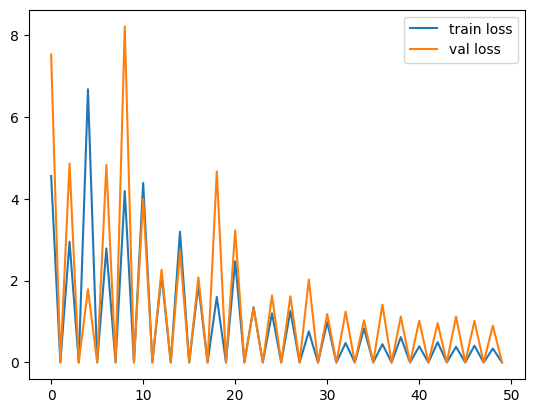

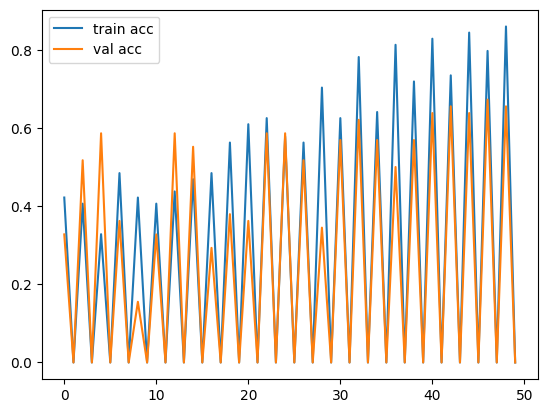

<Figure size 640x480 with 0 Axes>

In [19]:
#plotting the loss
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy 
plt.plot(r.history['accuracy'],label = 'train acc')
plt.plot(r.history['val_accuracy'],label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [20]:
from tensorflow.keras.models import load_model
model.save('model_resnet50_trial.h5')

In [21]:
y_pred = model.predict(test_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step


In [22]:
y_pred

array([[1.62814222e-02, 9.43479061e-01, 4.02395613e-02],
       [3.23615998e-01, 4.00192887e-01, 2.76191175e-01],
       [4.08570200e-01, 7.32036727e-03, 5.84109485e-01],
       [2.40629017e-02, 9.15854514e-01, 6.00825958e-02],
       [1.72139421e-01, 4.98131841e-01, 3.29728663e-01],
       [7.54784793e-02, 1.24130175e-01, 8.00391376e-01],
       [6.66907337e-03, 9.80803370e-01, 1.25276158e-02],
       [5.38323224e-02, 4.85361755e-01, 4.60805923e-01],
       [9.55309927e-01, 2.98249796e-02, 1.48650575e-02],
       [9.98890493e-03, 1.76682577e-01, 8.13328445e-01],
       [4.98502515e-04, 9.78091180e-01, 2.14103442e-02],
       [1.78330094e-02, 3.18239719e-01, 6.63927317e-01],
       [1.94928970e-03, 9.67152834e-01, 3.08978818e-02],
       [1.10595871e-03, 9.86252367e-01, 1.26416655e-02],
       [4.80341941e-01, 4.91675548e-02, 4.70490515e-01],
       [3.69567908e-02, 3.89165670e-01, 5.73877573e-01],
       [2.03123800e-02, 8.52064848e-01, 1.27622813e-01],
       [1.23227611e-01, 2.60880

In [23]:
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model = load_model('model_resnet50_trial.h5')

In [42]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg',target_size = (224,224))

In [43]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [44]:
x.shape

(224, 224, 3)

In [45]:
# Since we rescaled by 1/255
x = x/255
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.7607843 , 0.7372549 , 0.68235296],
        [0.84313726, 0.81960785, 0.77254903],
        [0.94509804, 0.92156863, 0.8745098 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.96862745, 0.9607843 , 0.9137255 ],
        [0.9607843 , 0.9490196 , 0.9137255 ],
        [0.95686275, 0.94509804, 0.9098039 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.972549  , 0.94509804],
        [0.95686275, 0.98039216, 0.972549  ],
        [0.95686275, 0.98039216, 0.972549  ]],

       ...,

       [[0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [46]:
x = np.expand_dims(x,axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[0.00324627, 0.01548956, 0.9812641 ]], dtype=float32)

In [48]:
a = np.argmax(model.predict(img_data),axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [49]:
a

array([2], dtype=int64)